<a href="https://colab.research.google.com/github/mrashutoshnigam/ai-ml-course/blob/main/Machine-Learning/Oreilly/Ch4_TrainingModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Models

In [1]:
!pip install pandas numpy scikit-learn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X= 2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

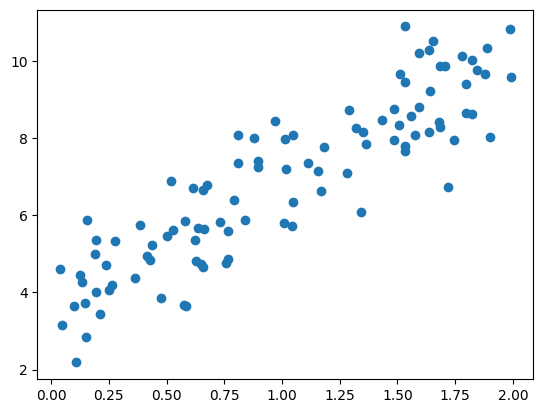

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.63280346],
       [3.22820551]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.63280346],
       [10.08921448]])

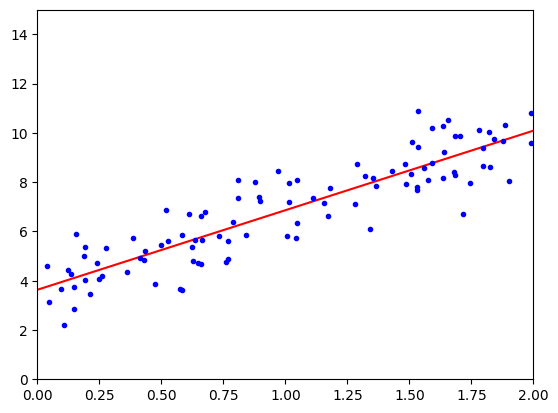

In [8]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.63280346]), array([[3.22820551]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.63280346],
       [10.08921448]])

In [11]:
theta_best_svd, residuals, rank ,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.63280346],
       [3.22820551]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.63280346],
       [3.22820551]])

In [13]:
# 4.7 Gradent Descent Step

eta = 0.1
n_iterations = 1000
m= 100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[3.63280346],
       [3.22820551]])

In [15]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[3.60605332],
       [3.27603646]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.63102612]), array([3.22499423]))

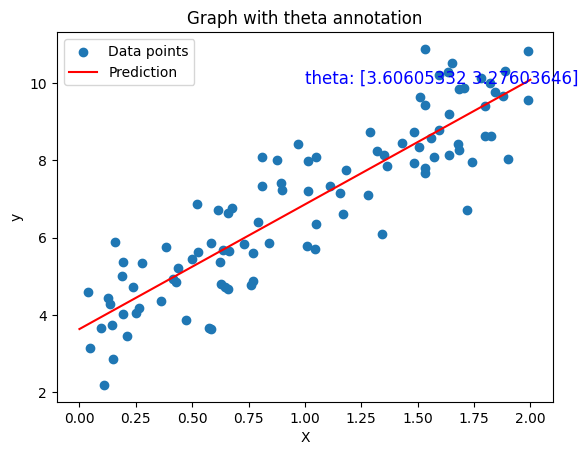

In [19]:
plt.scatter(X, y, label="Data points")
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.annotate(f"theta: {theta.flatten()}", xy=(1, 10), fontsize=12, color="blue")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Graph with theta annotation")
plt.show()

In [20]:
# 4.8 Polynomial Regression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-1.21885546,  1.48560863])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.98902739]), array([[0.99561479, 0.56642876]]))

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    train_errors, test_errors = [], []
    for m in range(1, len(X)):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X[:m])
        y_test_predict = model.predict(X)
        train_errors.append(mean_squared_error(y[:m], y_train_predict))
        test_errors.append(mean_squared_error(y, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test")

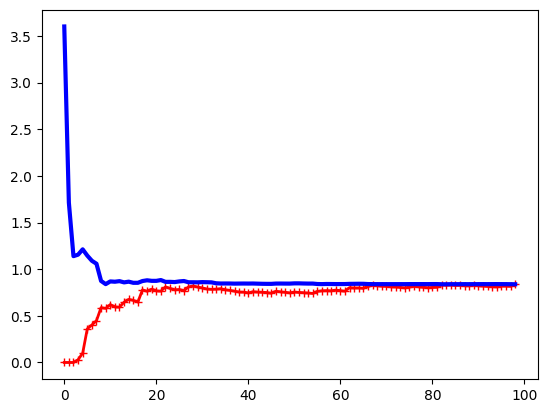

In [24]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X_poly, y)

In [25]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

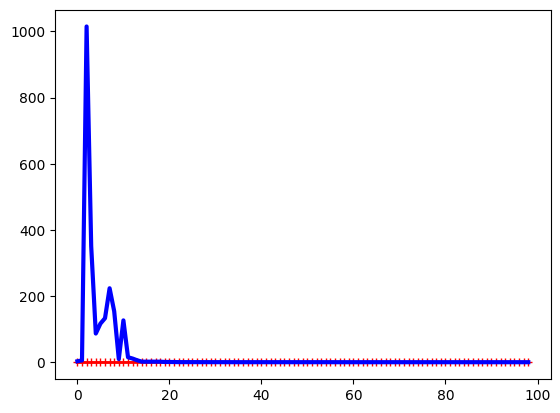

In [26]:
plot_learning_curve(polynomial_regression, X, y)